Look at how Rshock is distributed and compare with analytical solution 

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import Utilities.prelude
from Utilities.time_extractor import days_since_distruption
from Utilities.operators import make_tree

In [2]:
E = 0.1
den0 = 1
snap = '100'
folder = 'sedov'
path = f'{folder}/{snap}'

In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp = make_tree(path, snap, False)

all T=0, bro. Compute by myself!


In [4]:
def analytic_sol(t):
    rv = t * 5/2 
    return rv

def xi_shock(r_known, t_known):
    xi = r_known * (den0/(E * t_known**2))**(1/5)
    return xi

def rsh_expected(xi,t):
    rsh = xi*(E*t**2/den0)**(1/5)
    return rsh

In [5]:
# Load data
shock_surface100 = np.loadtxt('data/100/shocksurface_100.txt')
xshock100 = shock_surface100[0]
yshock100 = shock_surface100[1]
zshock100 = shock_surface100[2]

shock_surfacefinal = np.loadtxt('data/final/shocksurface_final.txt')
xshockfinal = shock_surfacefinal[0]
yshockfinal = shock_surfacefinal[1]
zshockfinal = shock_surfacefinal[2]
machfinal = shock_surfacefinal[3]


In [6]:
# Time of the snapshots
t100, _ = days_since_distruption('sedov/100/snap_100.h5')
t100 = t100.sum() #just beacuse it's an array
tfinal, _ = days_since_distruption('sedov/final/snap_final.h5')
tfinal = tfinal.sum()

In [7]:
# Find the numerical R_shock as the mean of R of the cells in the shock surface --> error = standard deviation 
rshock100 = np.sqrt(xshock100**2 + yshock100**2 + zshock100**2)
R100 = np.mean(rshock100)
errorR100 = np.std(rshock100)
relerr_R100 = errorR100 / R100

rshockfinal = np.sqrt(xshockfinal**2 + yshockfinal**2 + zshockfinal**2)
Rfinal = np.mean(rshockfinal)
errorRfinal = np.std(rshockfinal)
mach_final = np.mean(machfinal)


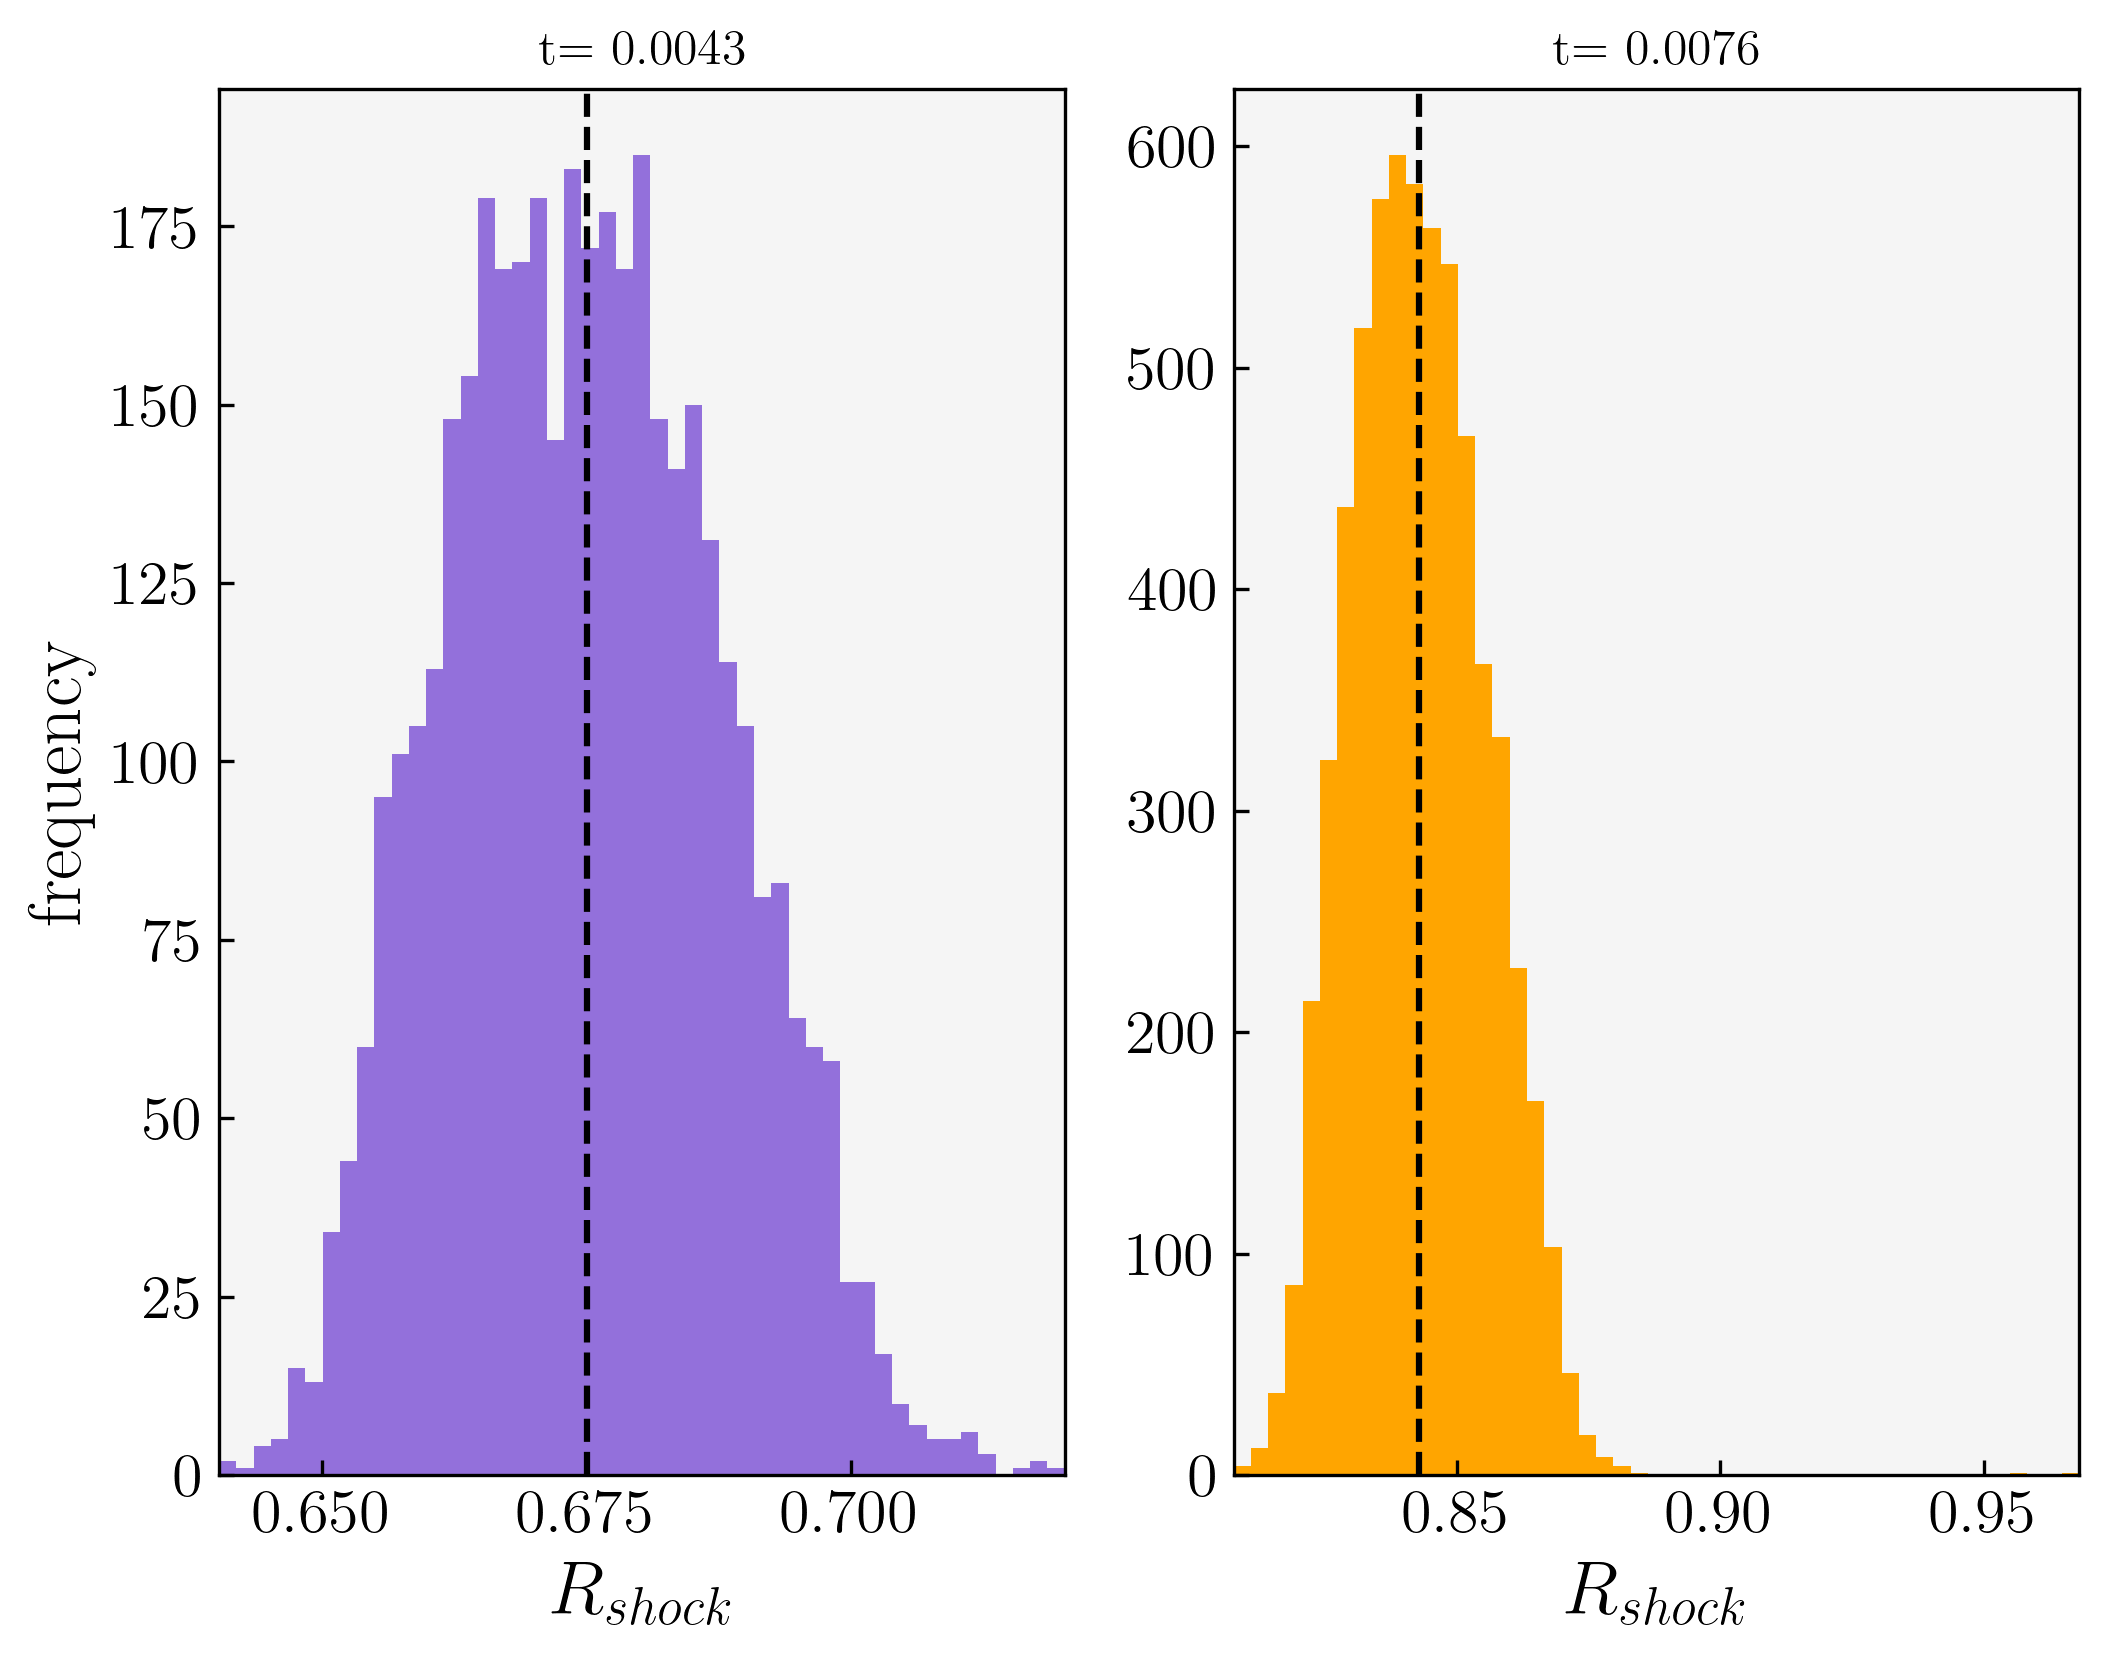

In [15]:
# Ditribution of Rshock
fig, ax = plt.subplots(1,2)
ax[0].hist(rshock100, bins = np.linspace(np.min(rshock100), np.max(rshock100), 50), color = 'mediumpurple')
#ax[0].scatter(rshock100, stats.norm.pdf(rshock100, R100, errorR100), s = 1, c = 'k')
ax[0].axvline(R100, c = 'k', linestyle = '--')
ax[0].set_xlabel(r'$R_{shock}$', fontsize = 18)
ax[0].set_ylabel('frequency', fontsize = 18)
ax[0].set_title(f't= {np.round(t100,4)}')
ax[0].set_xlim(np.min(rshock100), np.max(rshock100))

ax[1].hist(rshockfinal, bins = np.linspace(np.min(rshockfinal), np.max(rshockfinal), 50), color = 'orange')
ax[1].axvline(Rfinal, c = 'k', linestyle = '--')
#ax[1].scatter(rshockfinal, stats.norm.pdf(rshockfinal, Rfinal, errorRfinal), s = 1, c = 'k')
ax[1].set_xlabel(r'$R_{shock}$', fontsize = 18)
ax[1].set_title(f't= {np.round(tfinal,4)}')
ax[1].set_xlim(np.min(rshockfinal), np.max(rshockfinal))


plt.savefig('Figs/r_shock_freq.png')

In [9]:
# Find the expected R_shock_final from the numerical R100 and the analytical solution
xi = xi_shock(R100, t100)
rfinal_expected = rsh_expected(xi, tfinal)

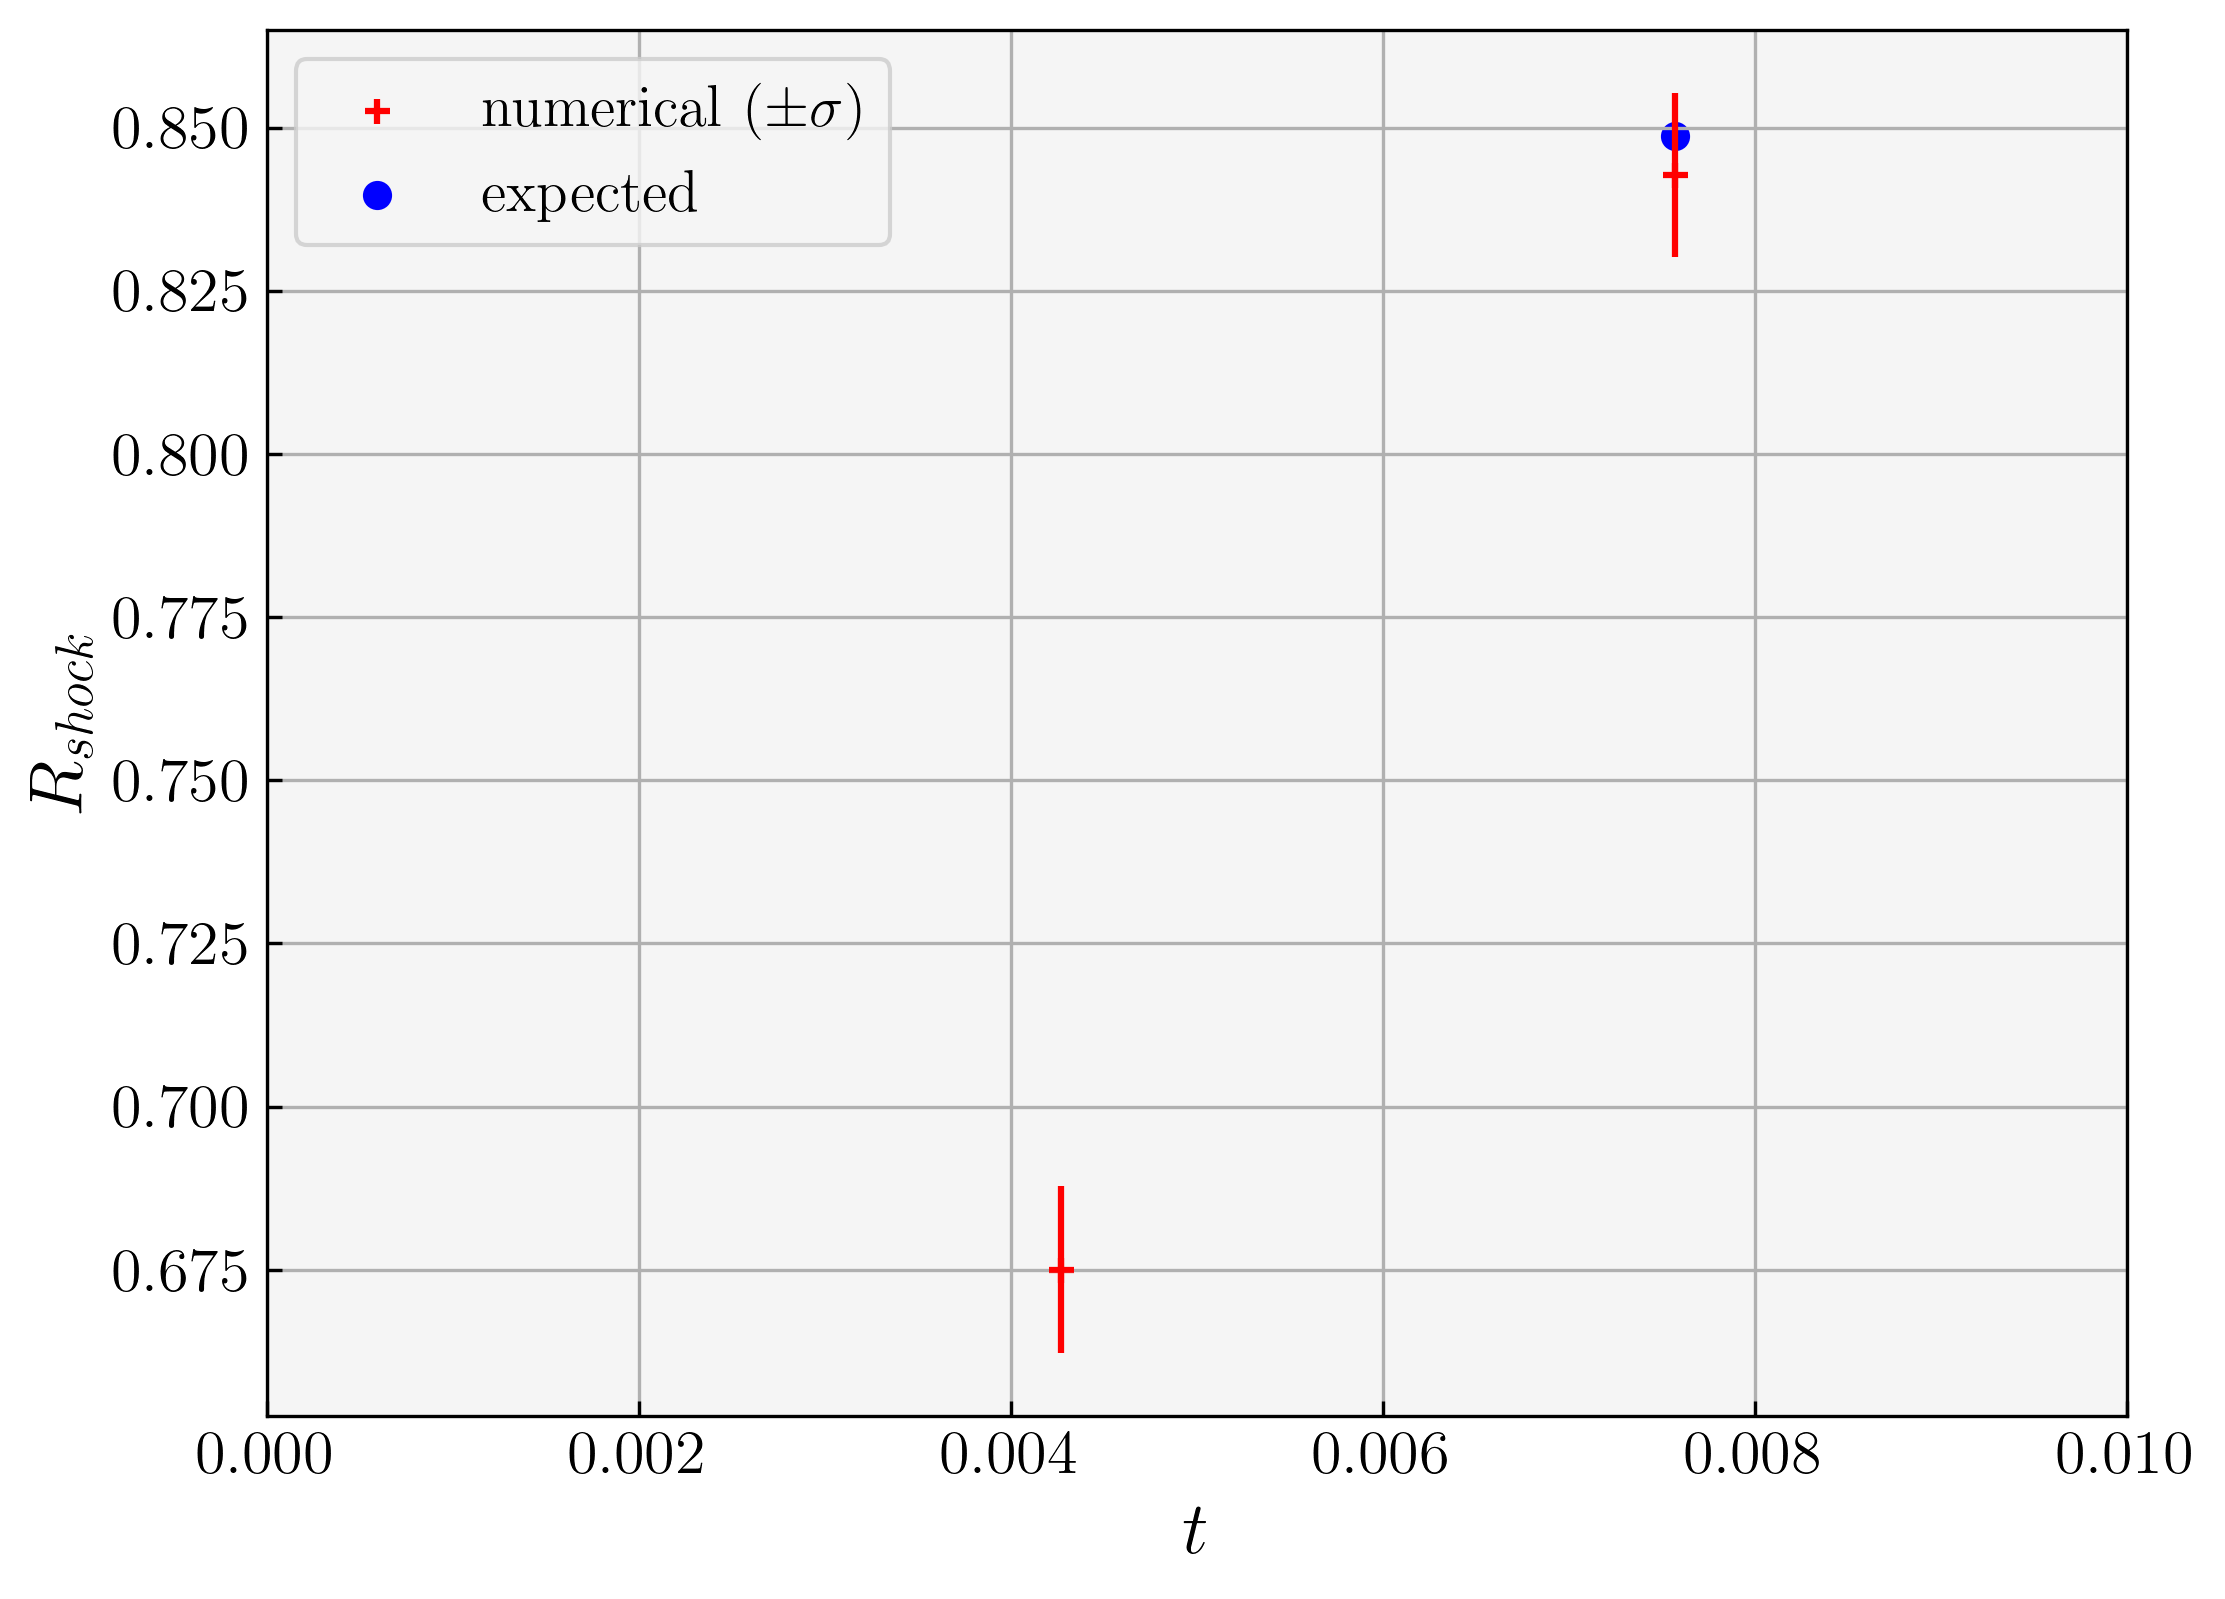

In [10]:
plt.scatter([t100, tfinal], [R100, Rfinal], marker = '+', c = 'r', label = r'numerical ($\pm\sigma$)')
plt.errorbar([t100, tfinal], [R100, Rfinal], yerr = [errorR100,errorRfinal], c = 'r', fmt ='+') #
plt.scatter(tfinal, rfinal_expected,  c = 'b', label = 'expected')
plt.xlim(0,0.01)
plt.xlabel(r'$t$', fontsize = 18)
plt.ylabel(r'$R_{shock}$', fontsize = 18)
plt.legend(fontsize = 14)
plt.grid()
plt.savefig('Figs/r_analyt.png')

In [11]:
temp_shocksurf_final = shock_surfacefinal[4]
temp_final = np.mean(temp_shocksurf_final)

In [12]:
# Find shock velocity as DeltaR/Deltat. Shoul be the velocity of the snapshot at time (tfinal + t100)/2, but we don't have it and use the one at t100
vshockmiddle = (Rfinal - R100) / (tfinal - t100)
verror =  errorRfinal + errorR100
relerr_v = verror / (Rfinal - R100)

tmiddle = t100 
ratiomiddle = R100/vshockmiddle 
relerr_ratio = relerr_R100 + relerr_v
error_ratio = relerr_ratio * ratiomiddle

In [13]:
# Analytic solution for r/v
time = np.arange(0, tfinal+0.01, 0.001)
analytic_rv = analytic_sol(time)

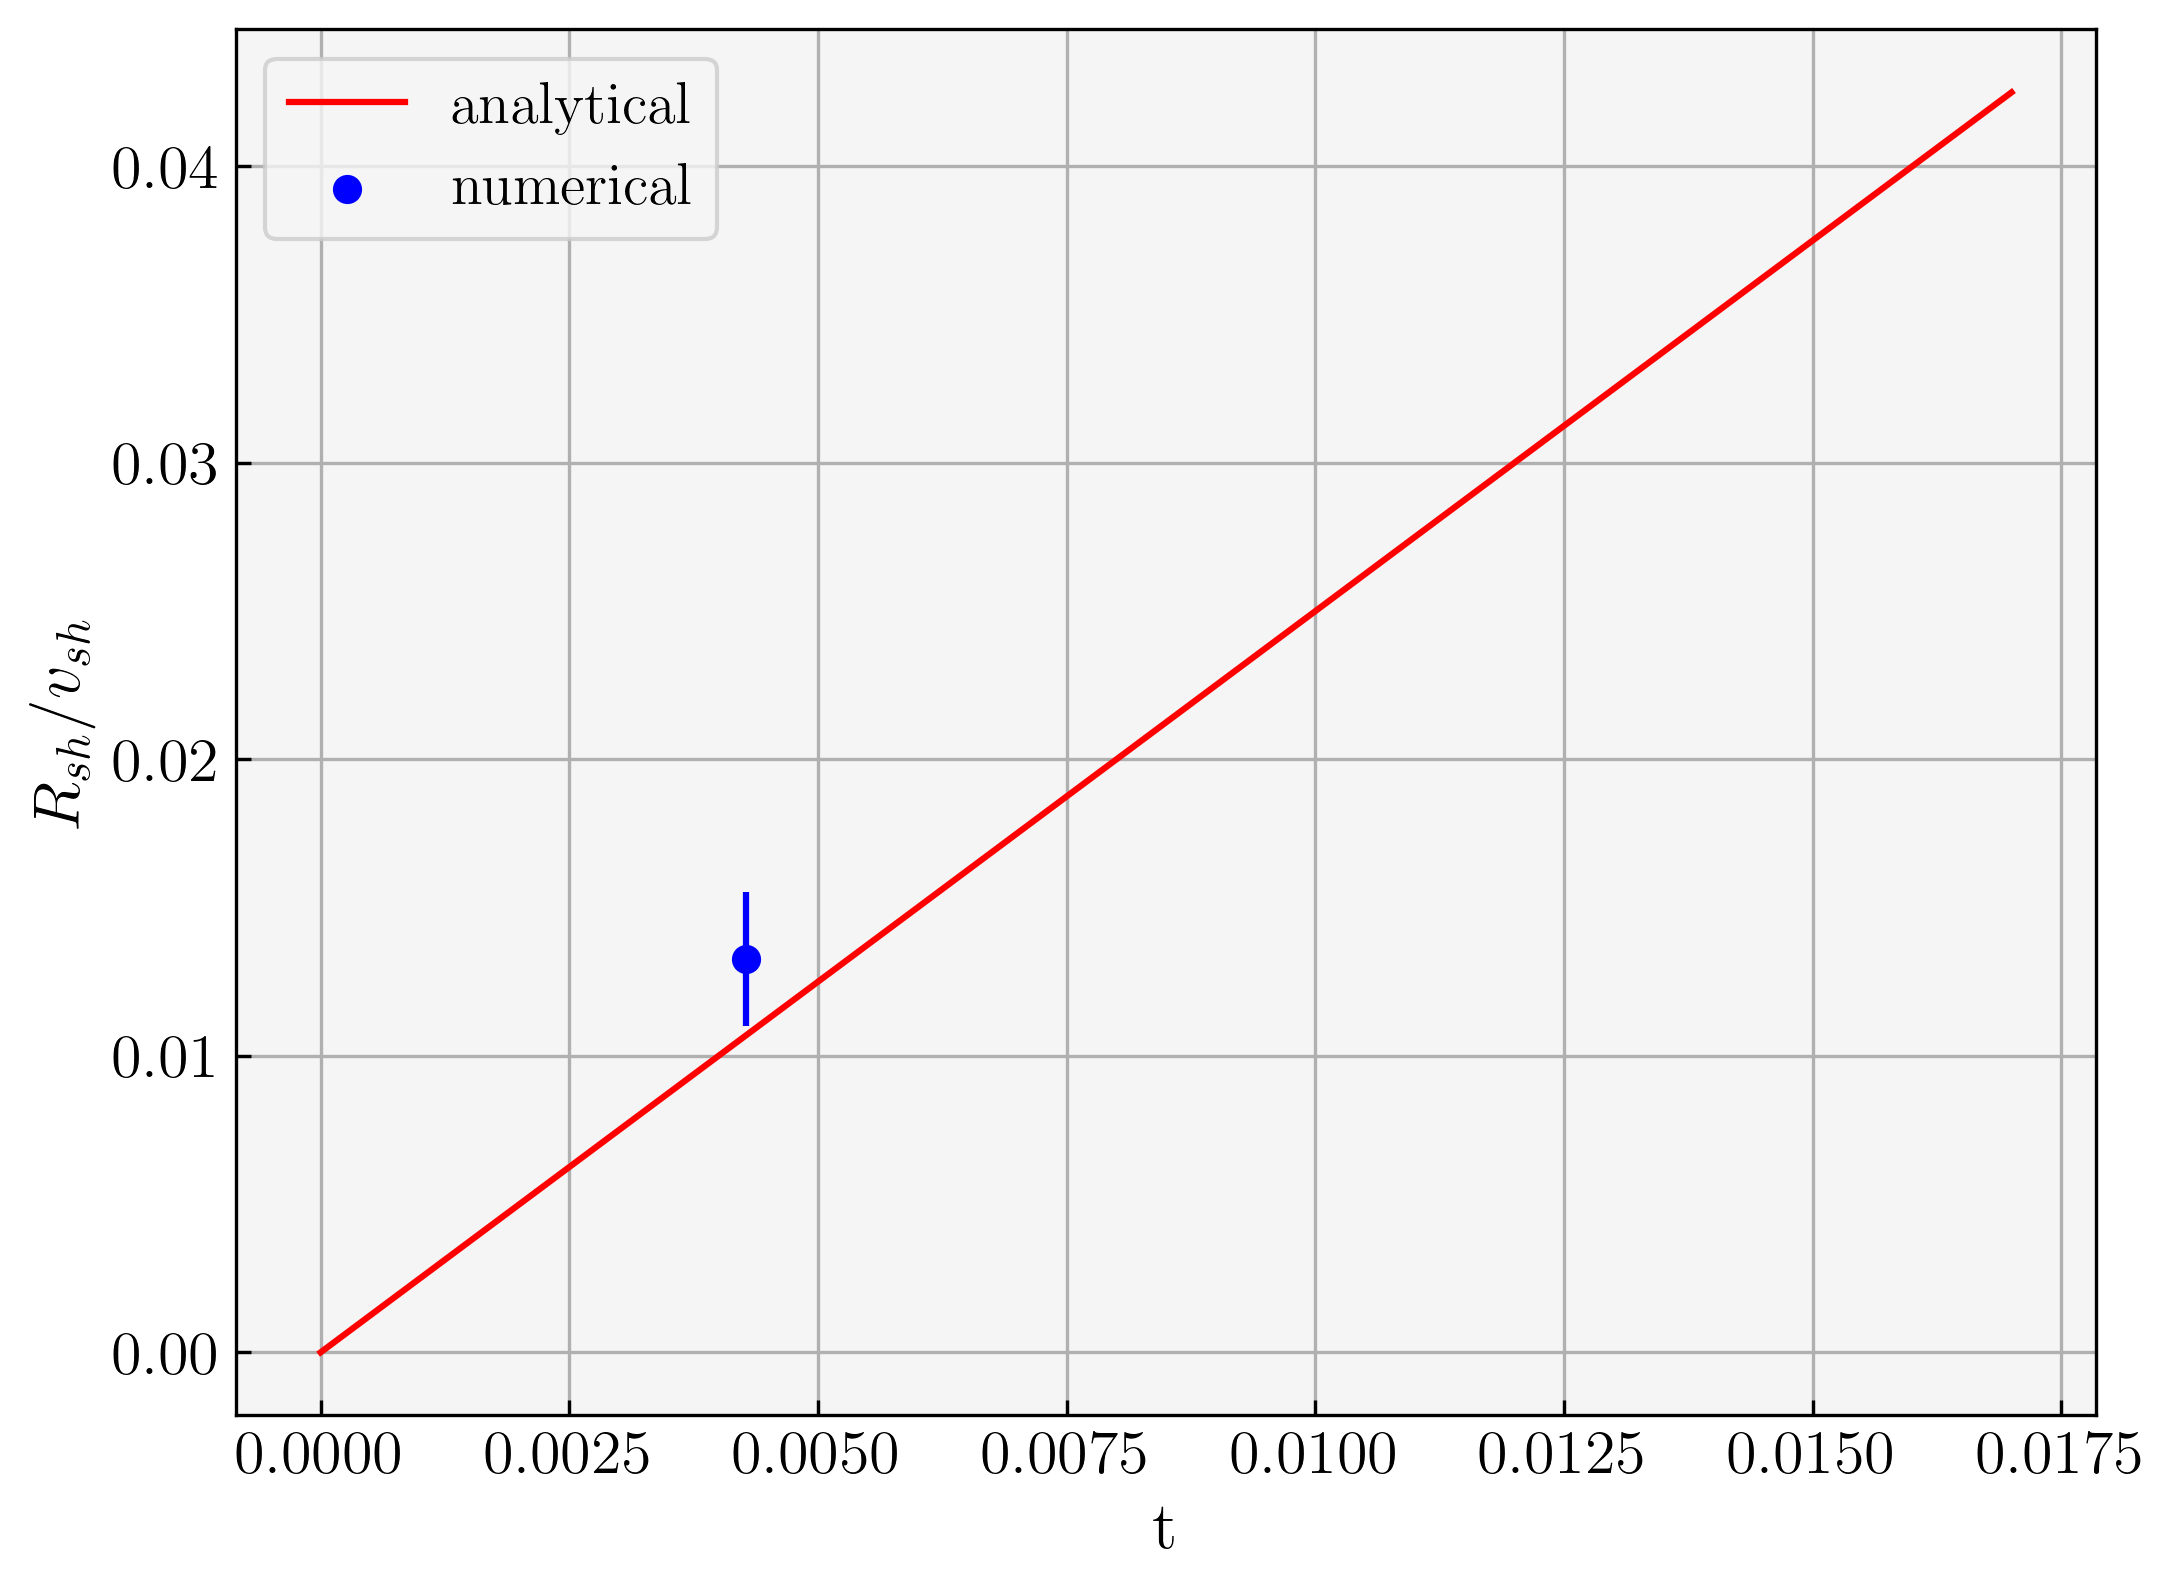

In [14]:
plt.plot(time, analytic_rv, color = 'r', label = 'analytical')
plt.scatter(tmiddle, ratiomiddle, c = 'b', label = 'numerical')
plt.errorbar(tmiddle, ratiomiddle, yerr = error_ratio, c = 'b')
plt.xlabel('t', fontsize = 16)
plt.ylabel(r'$R_{sh}/v_{sh}$', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()
plt.savefig('Figs/rv_analyt.png')